# Which Laptop Should I Pick


## ชุดข้อมูล


[Laptopdata](https://www.kaggle.com/datasets/dhanushbommavaram/laptop-dataset?resource=download) เป็นชุดข้อมูลคอมพิวเตอร์พกพาที่รวบรวมมาจาก [www.flipkart.com](https://www.flipkart.com/) โดยเป็นเว็บไซต์ขายของออนไลน์ในอินเดีย

ข้อมูลที่นำมาใช้ประกอบด้วย :

- `name` : ชื่อของโน๊ตบุ๊ค
- `Price` : ราคาของโน๊ตบุ๊คโดยจะเป็นราคาประมาณจากหน่วยรูปีโดยใช้อัตราแลกเปลี่ยนที่ 1 INR = 0.46 THB
- `Type` : ประเภทของโน๊ตบุ๊ค
- `Processor_Name` : รุ่นของ CPU ที่โน๊ตบุ๊คใช้
- `SSD_Capacity(GB)` : ความจุของ SSD ที่มี โดยใช้หน่วยเป็น GigaByte
- `HDD_Capacity(GB)` : ความจุของ HHD ที่มี โดยใช้หน่วยเป็น GigaByte
- `RAM(GB)` : ความจุของ RAM ที่มี โดยใช้หน่วยเป็น GigaByte
- `GPU_Score` : ประสิทธิภาพของ GPU ในแต่ละโน๊คบุ๊ค
- `ScreenReolution` : ความคมชัดของหน้าจอ


## นำเข้า library ที่ต้องใช้


In [29]:
#import zome
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial


## นำเข้าข้อมูล


In [30]:
field = ['Price(THB)',  'Processor_Name', 'SSD_Capacity(GB)',
         'HDD_Capacity(GB)', 'RAM(GB)', 'GPU_Score', 'ScreenReolution']
df = pd.read_csv("Laptop_Data.csv", skipinitialspace=True, usecols=field)


# แสดงผลขนาดMatrix ของข้อมูลทั้งหมด และเปลี่ยนข้อมูลให้เป็นarrayที่numpyสามารถอ่านได้


In [31]:
print("Matrix size: ", df.shape)
data = df.to_numpy()


Matrix size:  (950, 7)


# เปลี่ยนข้อมูลรุ่น CPU ให้เป็นตัวเลข โดยใช้เกณฑ์ดังนี้ โดยเรียงจากประสิทธิภาพ


- Intel Celeron = 1
- Intel Pantium = AMD Althon = 2
- Intel i3 = Ryzen 3 = 3
- Intel i5 = Ryzen 5 = 5
- Intel i7 = Ryzen 7 = 7
- Intel i9 = Ryzen 9 = 9


In [32]:
processor_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
processor_score = [1, 2, 2, 3, 3, 5, 5, 7, 7, 9, 9]
processor = ["Celeron", "Pentium", "Athlon", "Core i3", "Ryzen 3", "Core i5", "Ryzen 5",
             "Core i7", "Ryzen 7", "Core i9", "Ryzen 9"]
for i in range(0, len(data)):
    temp_data = data[i][1]
    temp_index = processor.index(temp_data)
    processor_count[temp_index] += 1
    data[i][1] = processor_score[temp_index]


# เปลี่ยนความคมชัดของหน้าจอให้เป็นตัวเลข โดยเรียงตามความคมชัด


In [33]:
resolution_list = ['1280x720', '1366X768', '1366x768', '1920x1080', '1920x1200', '1920x1280', '2160x1440',
                   '2240x1400', '2560x1440', '2560x1600', '2880x1800', '3000x2000', '3456x2160', '3840x2160', '3840x2400']
resolution_score = [1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 5, 7, 7, 7]
resolution_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, len(data)):
    temp_data = data[i][6]
    temp_index = resolution_list.index(temp_data)
    resolution_count[temp_index] += 1
    data[i][6] = resolution_score[temp_index]


# Pie Chart แสดงยี่ห้อของ CPU


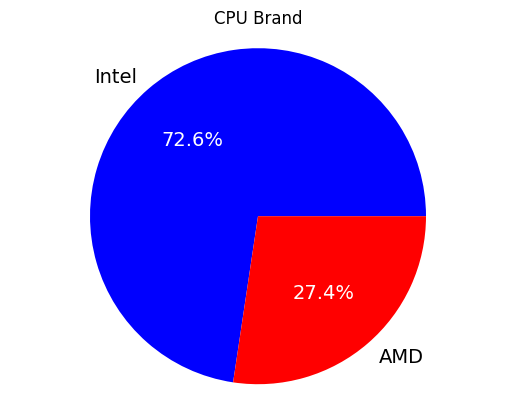

In [34]:
cpu_brand = pd.read_csv(
    "Laptop_Data.csv", skipinitialspace=True, usecols=['Processor_Brand'])
brand = cpu_brand.to_numpy()
brand_count = [0, 0]
brand_type = ["Intel", "AMD"]
for i in brand:
    if i == 'Intel':
        brand_count[0] += 1
    elif i == "AMD":
        brand_count[1] += 1

_, _, chart = plt.pie(brand_count, labels=brand_type, autopct='%1.1f%%', startangle=0, colors=[
                      'blue', 'red'], textprops={'fontsize': 14})
plt.title('CPU Brand')
plt.axis('equal')

for autotext in chart:
    autotext.set_color('white')
    autotext.set_size('14')
plt.show()
del cpu_brand, brand_count, brand_type, autotext, i


# กราฟแสดง CPU แต่ระรุ่นมีจำนวนเท่าไหร่


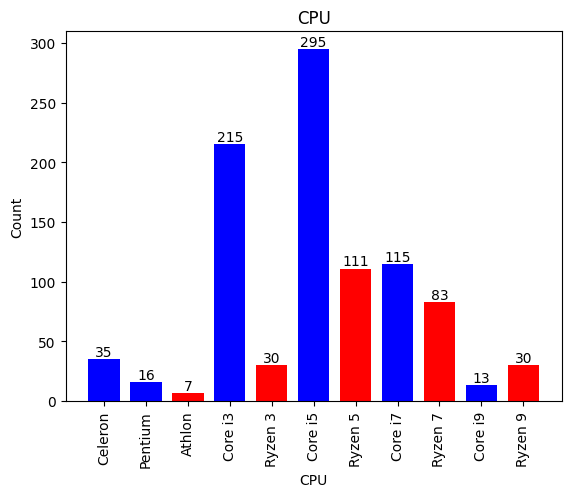

In [35]:
processor_name = ['Celeron', 'Pentium', 'Athlon', 'Core i3', 'Ryzen 3', 'Core i5',
                  'Ryzen 5', 'Core i7', 'Ryzen 7',  'Core i9', 'Ryzen 9']
barplot = plt.bar(processor_name, processor_count, width=0.75, color=[
                  'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red',  'blue', 'red'])
plt.bar_label(barplot, labels=processor_count, label_type='edge')
plt.title("CPU")
plt.xlabel('CPU')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
del processor_name, processor_count


# กราฟแสดงแรมที่มีบนโน๊ตบุ๊ค


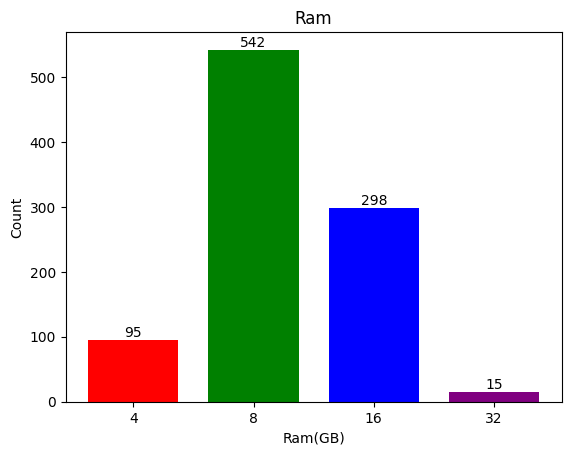

In [36]:
ram = [4, 8, 16, 32]
ram_count = [0, 0, 0, 0]
for i in range(0, len(data)):
    temp_data = data[i][4]
    if temp_data == 4:
        ram_count[0] += 1
    elif temp_data == 8:
        ram_count[1] += 1
    elif temp_data == 16:
        ram_count[2] += 1
    elif temp_data == 32:
        ram_count[3] += 1
ram = ['4', '8', '16', '32']
barplot = plt.bar(ram, ram_count, width=0.75, color=[
                  'red', 'green', 'blue', 'purple'])
plt.bar_label(barplot, labels=ram_count, label_type='edge')
plt.title("Ram")
plt.xlabel('Ram(GB)')
plt.ylabel('Count')
plt.show()
del temp_data, ram_count, ram


# กราฟแสดงGPU_SCORE โดยจะเปลี่ยนจากชื่อการ์ดจอให้เป็นตัวเลข โดยจะเรียงลำดับตามประสิทธิภาพดังนี้


- RTX 3070 Ti 9
- RTX 3070 8
- RTX 2080 Ti 8
- RTX 3060 Ti 7
- RTX 2080 Super 7
- RTX 2080 6.5
- RTX 2070 Super 6.4
- Radeon Graphics RX 6800M 6.3
- Radeon Graphics RX 6600M 6.1
- RTX 3060 6
- RTX 2070 5.8
- RTX 2060 Super 5.7
- RTX 3050 Ti 5.7
- RTX 2060 5.5
- RTX 3050 5.4
- GTX 1660 Super 5.4
- GTX 1660 Ti 5.3
- GTX 1070 5.3
- GTX 1660 5
- GTX 1650 Super 4.8
- GTX 1650 Ti 4.6
- Radeon Graphics RX5500M 4.5
- GTX 1650 4.5
- MX450 3.5
- MX350 3.5
- MX330 3.5
- MX130 3.3
- Iris Plus 3.2
- Radeon Graphics 3
- Iris Xe 3
- UHD 2


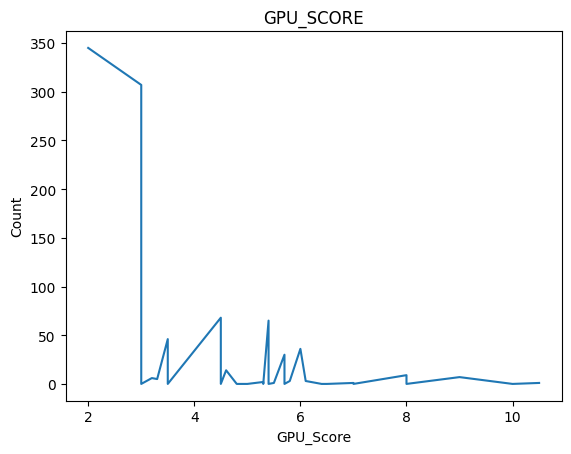

In [37]:
gpu_score = [10.5, 10, 9, 8, 8, 7, 7, 6.5, 6.4, 6.3, 6.1, 6, 5.8, 5.7, 5.7, 5.5,
             5.4, 5.4, 5.3, 5.3, 5, 4.8, 4.6, 4.5, 4.5, 3.5, 3.5, 3.5, 3.3, 3.2, 3, 3, 2]
gpu = []
gpu_score.sort()
for i in range(0, len(gpu_score)):
    gpu.append(int(0))
for i in range(0, len(data)):
    temp_data = data[i][5]
    temp_index = gpu_score.index(temp_data)
    gpu[temp_index] += 1
plt.plot(gpu_score, gpu)
plt.xlabel('GPU_Score')
plt.ylabel("Count")
plt.title("GPU_SCORE")
del gpu, temp_data, temp_index, gpu_score


# Pie Chart แสดงโน๊ตบุ๊คที่ใช้ SSD หรือ HDD


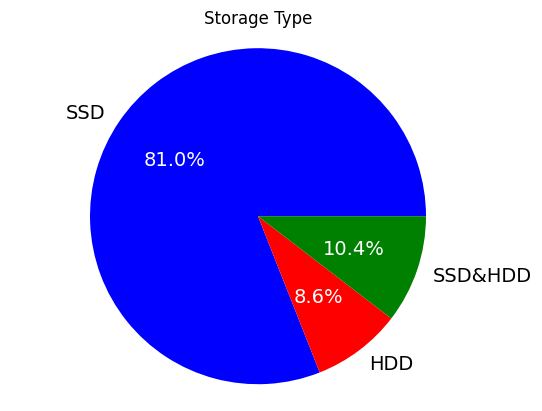

In [38]:
storage_type = ["SSD", "HDD", "SSD&HDD"]
storage_count = [0, 0, 0]
for i in range(0, len(data)):
    temp_ssd = data[i][2]
    temp_hdd = data[i][3]
    if temp_ssd != 0 and temp_hdd != 0:
        storage_count[2] += 1
    elif temp_ssd != 0:
        storage_count[0] += 1
    elif temp_hdd != 0:
        storage_count[1] += 1
_, _, chart = plt.pie(storage_count, labels=storage_type, autopct='%1.1f%%', startangle=0, colors=[
                      'blue', 'red', 'green'], textprops={'fontsize': 14})
plt.title('Storage Type')
plt.axis('equal')

for autotext in chart:
    autotext.set_color('white')
    autotext.set_size('14')
plt.show()
del storage_count, storage_type, i

# กราฟแสดงความคมชัดของหน้าจอ


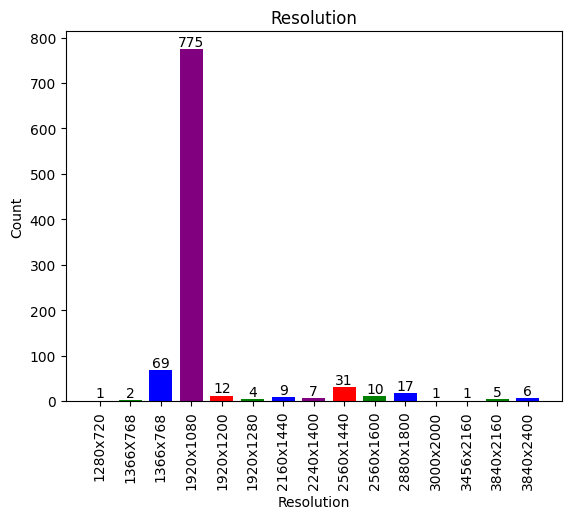

In [39]:
barplot = plt.bar(resolution_list, resolution_count, width=0.75,
                  color=['red', 'green', 'blue', 'purple'])
plt.bar_label(barplot, labels=resolution_count, label_type='edge')
plt.title("Resolution")
plt.xlabel('Resolution')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# แก้ไขข้อมูลในส่วนของ ราคา ความจุ เพื่อให้การกระจายของตัวเลขไม่กว้างเกินไป


In [40]:
for i in range(0, len(data)):
    data[i][0] /= 10000  # ราคา
    data[i][2] /= 100  # SSD
    data[i][3] /= 100  # HDD
    data[i][4] /= 2  # Ram


# คำนวณ Cosine Similarity


![alt text](Picture/Cosine_Similarity.png "Title")
![alt text](Picture/Cosine_Formula.png "Title")


In [43]:
# นำเข้าเวคเตอร์ของผู้ใช้ และ vector ของข้อมูลทั้งหมด
def calculate_cosine_sim(vecoter, data):
    similarity = []
    for i in range(0, len(data)):
        similarity.append(
            1-spatial.distance.cosine(vecoter, data[i]))
    return similarity


price = 2  # 20k
# cpu_option = ["Intel Celeron","Intel Pentium,\nAMD Althon","Intel i3,Ryzen 3","Intel i5,Ryzen 5","Intel i7,Ryzen 7","Intel i9,Ryzen 9"] ให้อ้างอิงจาก index
cpu = 5
#ssd = [0,2.56,5.12,10,20]
ssd = 5.12
#hdd = [0,5.12,10]
hdd = 0
ram = 8  # ram = [4,8,16,32]
gpu_score = 5  # ~gtx1660
# resolution = [(hd,1),(fhd,3),(2k,5),(4k,7)]
resolution = 3


# ราคา cpu ssd hdd ram gpu resolution
df_to_show = pd.read_csv("Laptop_Data.csv", skipinitialspace=True)
similarity = calculate_cosine_sim(np.asarray(
    [price, cpu, ssd, hdd, ram/2, gpu_score, resolution]), data)
print(df_to_show.loc[similarity.index(max(similarity))])
del similarity, df_to_show


No.                                                                      929
name                                                                    acer
Series                                                              Aspire 7
Model_Name                                                               NaN
Model_Number                                                   A715-41G-R7YZ
Color                                                         Charcoal Black
Price(THB)                                                          20686.82
Type                                                           Gaming Laptop
Suitable_For                               Processing & Multitasking, Gaming
Power_Supply                                                135 W AC Adapter
Processor_Brand                                                          AMD
Processor_Name                                                       Ryzen 5
Vaiant                                                                 3550H

# ส่งออกข้อมูลเพื่อนำไปประมวลผลในอีกโปรแกรม


In [42]:
exportdf = pd.DataFrame(
    data, columns=['Price', 'CPU', 'SSD', 'HDD', 'Ram', 'GPU', 'Resolution'])
exportdf.to_csv("Data_Used_ToCal.csv")